In [2]:
import pandas as pd
from statistics import mean, stdev
import scipy
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import glob
import numpy as np
import json

In [3]:
plt.rcParams["figure.figsize"] = (8,7)

# var glo

In [22]:
#directory
json_dir = "architecture_json/"
csv_dir = "architecture_csv/"

# file name
json_filename = "zen_score.json"
csv_filename = "architecture_results.csv"


# Experiment 1 mnist
- 1/3 merge
- 1/5 dropout
- 2,3,4,5,6,7 fe

In [23]:
exp1_dir = "experiment_1/"

## data Json

In [24]:
df_exp1_json = pd.read_json (json_dir+exp1_dir+json_filename)

In [25]:
df_exp1_json

,avg_nas_score,avg_precision,dropout,file_name,nb_layer,nb_layer_tot,pooling,std_nas_score,time_cost,time_glo
0,-inf,NaN,18,architecture_1,230,301,53,NaN,1.422467,45.518940
1,0.008908,0.055080,1,architecture_2,7,11,3,0.158969,0.049477,1.583270
2,-27.144455,0.180732,2,architecture_3,46,55,7,0.521620,0.273400,8.748784
3,-inf,NaN,12,architecture_4,145,179,22,NaN,0.985646,31.540675
4,0.756579,0.062498,1,architecture_5,3,5,1,0.180378,0.020158,0.645052
5,-inf,NaN,0,architecture_6,2,3,1,NaN,0.013407,0.429027
6,-inf,NaN,15,architecture_7,124,168,29,NaN,0.749130,23.972166
7,-12.188940,0.149163,0,architecture_8,24,31,7,0.430507,0.144556,4.625794
8,-24.935916,0.125515,5,architecture_9,43,56,8,0.362256,0.258647,8.276693
9,-9.199382,0.123299,2,architecture_10,17,27,8,0.355860,0.102173,3.269532


## data csv

In [58]:
df_exp1_csv = pd.read_csv(csv_dir + exp1_dir + csv_filename)

In [59]:
df_exp1_csv

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs
0,architecture_1,1152.318511,2.255126,0.3867,0.379383,2.294966,342,11
1,architecture_2,355.716131,0.066548,0.9885,0.993200,0.035041,17,56
2,architecture_3,2425.144378,0.263205,0.9909,0.991817,0.874300,66,47
3,architecture_4,1361.096116,0.048022,0.9855,0.987050,0.044865,204,36
4,architecture_5,247.642114,0.297062,0.9600,0.975567,0.131519,10,76
5,architecture_6,230.998066,0.182165,0.9662,0.988567,0.059385,6,72
6,architecture_7,2859.237090,0.336785,0.9070,0.900367,0.359187,191,39
7,architecture_8,568.403396,0.056333,0.9832,0.990567,0.031784,40,47
8,architecture_9,843.253069,0.244949,0.9275,0.932000,0.221587,64,71
9,architecture_10,102.544739,0.404285,0.8781,0.871000,0.432104,35,10


## merge data

In [60]:
df_exp1 = df_exp1_csv.merge(df_exp1_json, "left")

In [61]:
# revome -inf & NaN value
df_exp1['avg_nas_score'] = df_exp1['avg_nas_score'].replace(float("-inf"), -50)
df_exp1['avg_precision'] = df_exp1['avg_precision'].fillna(0)
df_exp1['std_nas_score'] = df_exp1['std_nas_score'].fillna(0)

In [62]:
df_exp1['cost_tt'] = df_exp1['training_time(s)']/df_exp1['epochs']

In [63]:
df_exp1

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,avg_nas_score,avg_precision,dropout,nb_layer,nb_layer_tot,pooling,std_nas_score,time_cost,time_glo,cost_tt
0,architecture_1,1152.318511,2.255126,0.3867,0.379383,2.294966,342,11,-50.000000,0.000000,18,230,301,53,0.000000,1.422467,45.518940,104.756228
1,architecture_2,355.716131,0.066548,0.9885,0.993200,0.035041,17,56,0.008908,0.055080,1,7,11,3,0.158969,0.049477,1.583270,6.352074
2,architecture_3,2425.144378,0.263205,0.9909,0.991817,0.874300,66,47,-27.144455,0.180732,2,46,55,7,0.521620,0.273400,8.748784,51.598817
3,architecture_4,1361.096116,0.048022,0.9855,0.987050,0.044865,204,36,-50.000000,0.000000,12,145,179,22,0.000000,0.985646,31.540675,37.808225
4,architecture_5,247.642114,0.297062,0.9600,0.975567,0.131519,10,76,0.756579,0.062498,1,3,5,1,0.180378,0.020158,0.645052,3.258449
5,architecture_6,230.998066,0.182165,0.9662,0.988567,0.059385,6,72,-50.000000,0.000000,0,2,3,1,0.000000,0.013407,0.429027,3.208306
6,architecture_7,2859.237090,0.336785,0.9070,0.900367,0.359187,191,39,-50.000000,0.000000,15,124,168,29,0.000000,0.749130,23.972166,73.313772
7,architecture_8,568.403396,0.056333,0.9832,0.990567,0.031784,40,47,-12.188940,0.149163,0,24,31,7,0.430507,0.144556,4.625794,12.093689
8,architecture_9,843.253069,0.244949,0.9275,0.932000,0.221587,64,71,-24.935916,0.125515,5,43,56,8,0.362256,0.258647,8.276693,11.876804
9,architecture_10,102.544739,0.404285,0.8781,0.871000,0.432104,35,10,-9.199382,0.123299,2,17,27,8,0.355860,0.102173,3.269532,10.254474


<AxesSubplot:ylabel='cost_tt'>

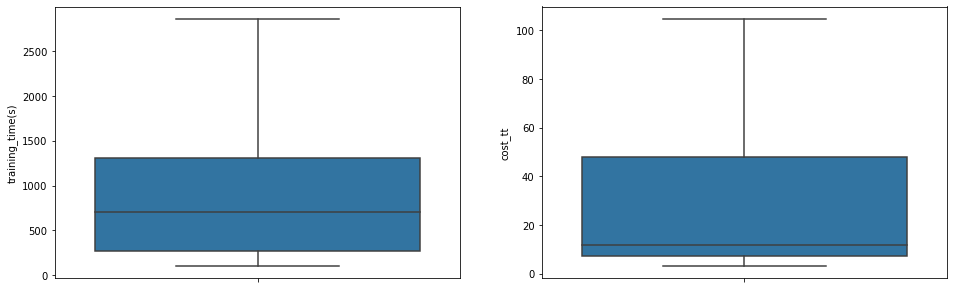

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))
sns.boxplot(
    y = 'training_time(s)',
    data = df_exp1,
    ax = ax1
)

sns.boxplot(
    y = 'cost_tt',
    data = df_exp1,
    ax = ax2
)

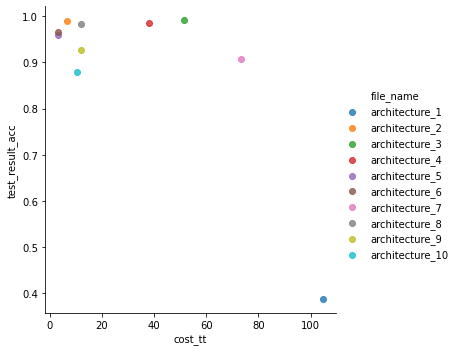

In [73]:
sns.lmplot(
    x='cost_tt',
    y='test_result_acc',
    data=df_exp1,
    fit_reg=False,
    hue='file_name'
)

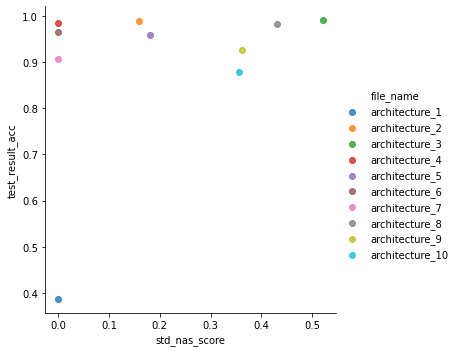

In [74]:
sns.lmplot(
    x='std_nas_score',
    y='test_result_acc',
    data=df_exp1,
    fit_reg=False,
    hue='file_name'
)

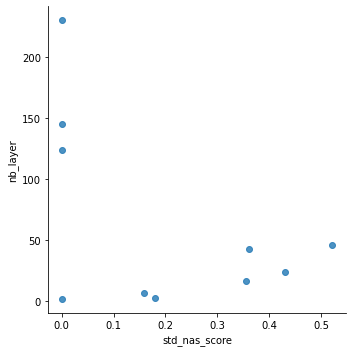

In [68]:
sns.lmplot(
    x='std_nas_score',
    y='nb_layer',
    data=df_exp1,
    fit_reg=False
)

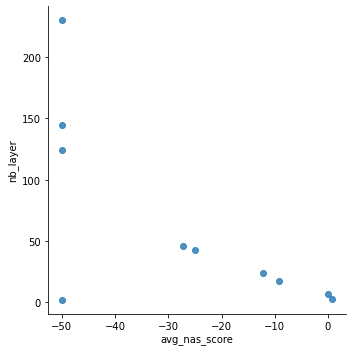

In [70]:
sns.lmplot(
    x='avg_nas_score',
    y='nb_layer',
    data=df_exp1,
    fit_reg=False
)

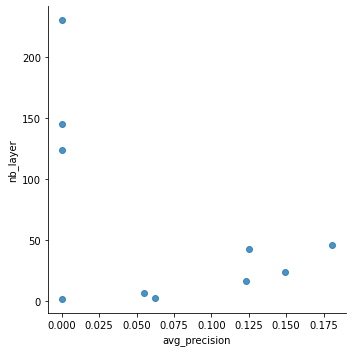

In [71]:
sns.lmplot(
    x='avg_precision',
    y='nb_layer',
    data=df_exp1,
    fit_reg=False
)